In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [3]:
response = requests.get('https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json')
content = response.content
data = pd.read_json(content)
data.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,srcUpdateTime,updateTime,infoTime,infoDate
0,500101001,YouBike2.0_捷運科技大樓站,28,1,大安區,2022-09-30 14:23:12,25.02605,121.54360,復興南路二段235號前,Daan Dist.,YouBike2.0_MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,27,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:23:12,2022-09-30
1,500101002,YouBike2.0_復興南路二段273號前,22,1,大安區,2022-09-30 14:27:03,25.02565,121.54357,復興南路二段273號西側,Daan Dist.,YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.,No.273， Sec. 2， Fuxing S. Rd. (West),21,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:27:03,2022-09-30
2,500101003,YouBike2.0_國北教大實小東側門,16,15,大安區,2022-09-30 14:25:06,25.02429,121.54124,和平東路二段96巷7號,Daan Dist.,YouBike2.0_NTUE Experiment Elementary School (...,No. 7， Ln. 96， Sec. 2， Heping E. Rd,1,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:25:06,2022-09-30
3,500101004,YouBike2.0_和平公園東側,11,3,大安區,2022-09-30 14:27:12,25.02351,121.54282,和平東路二段118巷33號,Daan Dist.,YouBike2.0_Heping Park (East),No. 33， Ln. 118， Sec. 2， Heping E. Rd,8,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:27:12,2022-09-30
4,500101005,YouBike2.0_辛亥復興路口西北側,16,0,大安區,2022-09-30 14:19:04,25.02153,121.54299,復興南路二段368號,Daan Dist.,YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...,No. 368， Sec. 2， Fuxing S. Rd.,16,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:19:04,2022-09-30


In [4]:
data['sna'] = data['sna'].str.replace('YouBike2.0_', '')
data['snaen'] = data['snaen'].str.replace('YouBike2.0_', '')
data.head()

<ipython-input-4-aa5aa98c81f1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sna'] = data['sna'].str.replace('YouBike2.0_', '')
<ipython-input-4-aa5aa98c81f1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['snaen'] = data['snaen'].str.replace('YouBike2.0_', '')


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,srcUpdateTime,updateTime,infoTime,infoDate
0,500101001,捷運科技大樓站,28,1,大安區,2022-09-30 14:23:12,25.02605,121.54360,復興南路二段235號前,Daan Dist.,MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,27,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:23:12,2022-09-30
1,500101002,復興南路二段273號前,22,1,大安區,2022-09-30 14:27:03,25.02565,121.54357,復興南路二段273號西側,Daan Dist.,No.273， Sec. 2， Fuxing S. Rd.,No.273， Sec. 2， Fuxing S. Rd. (West),21,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:27:03,2022-09-30
2,500101003,國北教大實小東側門,16,15,大安區,2022-09-30 14:25:06,25.02429,121.54124,和平東路二段96巷7號,Daan Dist.,NTUE Experiment Elementary School (East),No. 7， Ln. 96， Sec. 2， Heping E. Rd,1,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:25:06,2022-09-30
3,500101004,和平公園東側,11,3,大安區,2022-09-30 14:27:12,25.02351,121.54282,和平東路二段118巷33號,Daan Dist.,Heping Park (East),No. 33， Ln. 118， Sec. 2， Heping E. Rd,8,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:27:12,2022-09-30
4,500101005,辛亥復興路口西北側,16,0,大安區,2022-09-30 14:19:04,25.02153,121.54299,復興南路二段368號,Daan Dist.,Xinhai Fuxing Rd. Intersection (Northwest),No. 368， Sec. 2， Fuxing S. Rd.,16,1,2022-09-30 14:30:23,2022-09-30 14:30:41,2022-09-30 14:19:04,2022-09-30


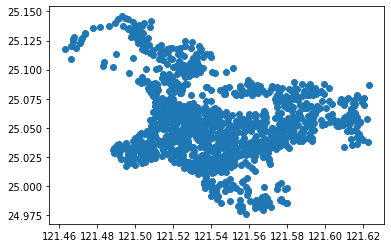

In [5]:
plt.scatter(data['lng'], data['lat'])
plt.show()

In [6]:
station_info = []
for i in data.index:
    info = 'Station(Zh): {} <br> Station(En): {} <br> Rentable: {} <br> Vacancy: {}'.format(data.sna[i], data.snaen[i], data.sbi[i], data.bemp[i])
    station_info.append(info)
station_info

['Station(Zh): 捷運科技大樓站 <br> Station(En): MRT Technology Bldg. Sta. <br> Rentable: 1 <br> Vacancy: 27',
 'Station(Zh): 復興南路二段273號前 <br> Station(En): No.273， Sec. 2， Fuxing S. Rd. <br> Rentable: 1 <br> Vacancy: 21',
 'Station(Zh): 國北教大實小東側門 <br> Station(En): NTUE Experiment Elementary School (East) <br> Rentable: 15 <br> Vacancy: 1',
 'Station(Zh): 和平公園東側 <br> Station(En): Heping Park (East) <br> Rentable: 3 <br> Vacancy: 8',
 'Station(Zh): 辛亥復興路口西北側 <br> Station(En): Xinhai Fuxing Rd. Intersection (Northwest) <br> Rentable: 0 <br> Vacancy: 16',
 'Station(Zh): 復興南路二段280號前 <br> Station(En): No. 280， Sec. 2， Fuxing S. Rd. <br> Rentable: 0 <br> Vacancy: 11',
 'Station(Zh): 復興南路二段340巷口 <br> Station(En): Ln. 340， Sec. 2， Fuxing S. Rd. <br> Rentable: 0 <br> Vacancy: 11',
 'Station(Zh): 新生南路三段52號前 <br> Station(En): No. 52， Sec. 3， Xinsheng S. Rd. <br> Rentable: 1 <br> Vacancy: 16',
 'Station(Zh): 新生南路三段66號前 <br> Station(En): No. 66， Sec. 3， Xinsheng S. Rd. <br> Rentable: 2 <br> Vacancy: 14',
 '

In [7]:
def changeColor(rentable):
    if rentable == 0:
        return 'red'
    else:
        return 'green'


bike_station_map = folium.Map(location=[data.lat.mean(), data.lng.mean()], control_scale=True, zoom_start=12)
for i in data.index:
    folium.Marker(
        location=[data.lat[i], data.lng[i]],
        popup=folium.Popup(station_info[i], max_width=500),
        icon=folium.Icon(icon='bicycle', prefix='fa', color=changeColor(data.sbi[i]))
    ).add_to(bike_station_map)
bike_station_map

In [8]:
bike_station_map.save('bike_station_map.html')